# Library

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score

# Reading the Data

In [2]:
INPUT_DIR = './input/data.csv'

In [3]:
data = pd.read_csv(INPUT_DIR)

Let's take a look at the first couple of data.

In [26]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Based on that, there is 33 columns, which 31 of them is the features.

In [5]:
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


There is one strange name which is 'Unnamed: 32', will get rid of this. Column 'id' and 'diagnosis' will not be included for the training process later, so this will be gone as well.

In [6]:
y = data.diagnosis
drop = ['id', 'diagnosis', 'Unnamed: 32']
x = data.drop(drop, axis=1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


This looks clean enough for features. But, there are too many features right now, and we will use Feature Selection and Feature Extraction. But before that, we will take a look at the content of the data.

Number of Benign:  357
Number of Malignant :  212


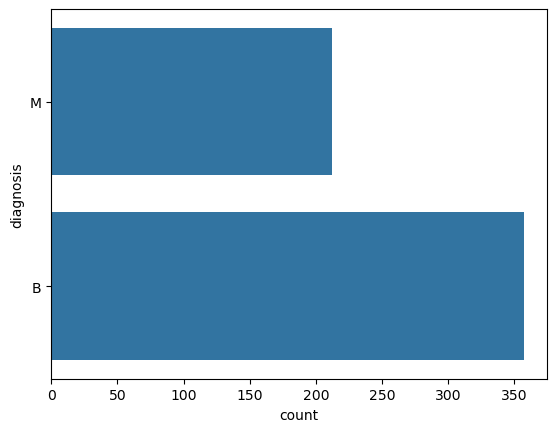

In [7]:
ax = sns.countplot(y,label="Count")
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

The distribution of the labels look balanced.

In [8]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Data Visualization

### Violin Plot

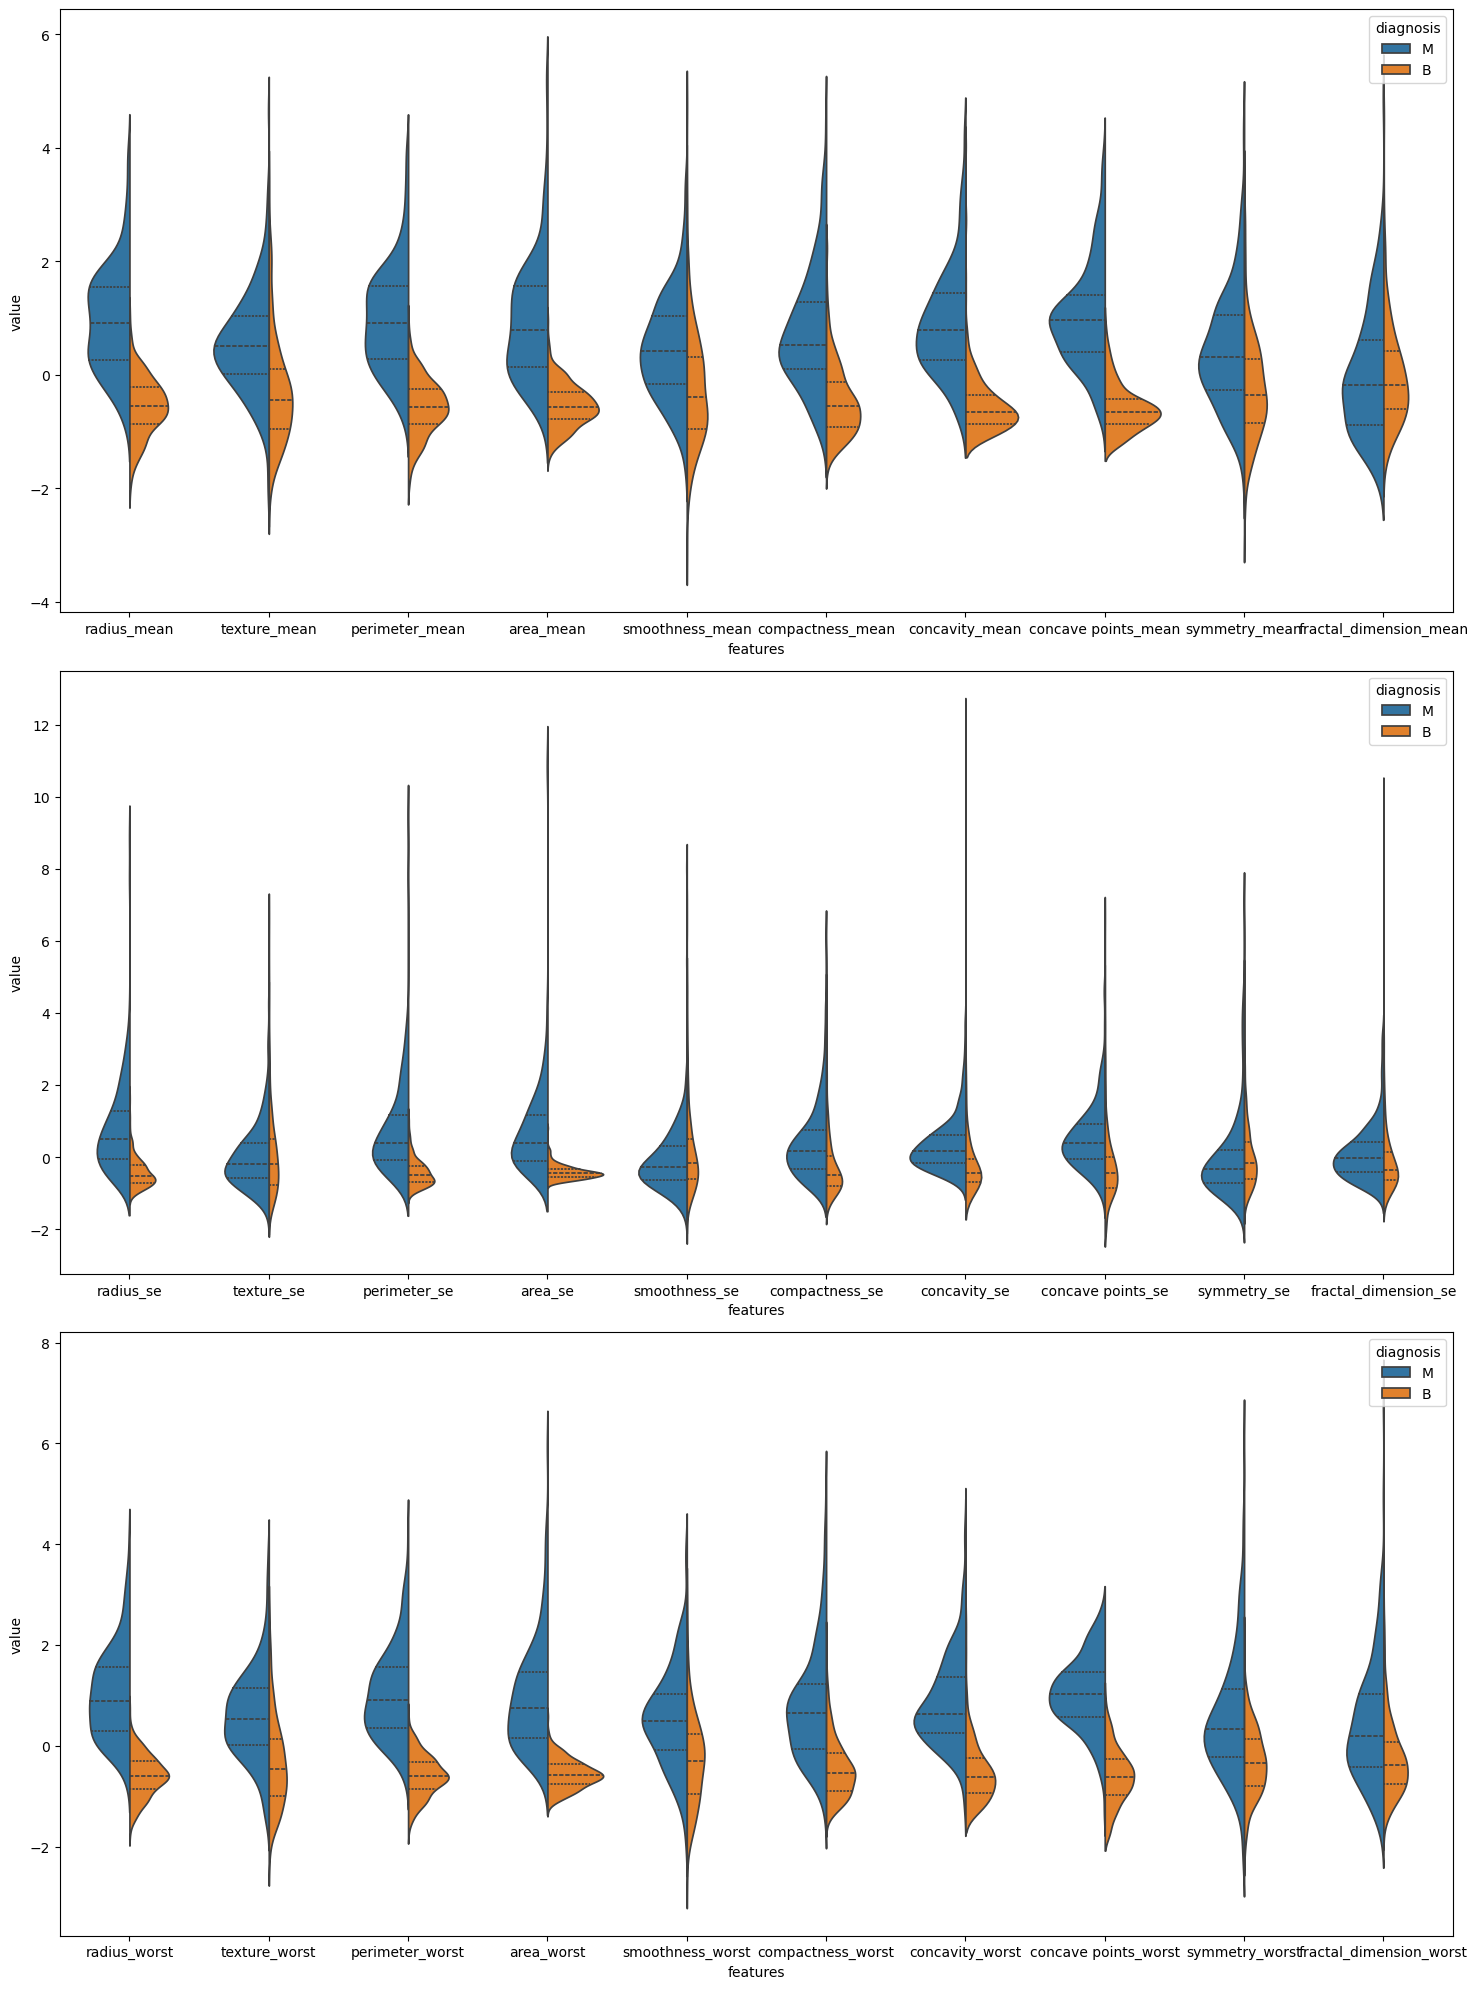

In [9]:
# using violin plot for the data
# Standardizing the features
features = x.columns
data_n_2 = (x - x.mean()) / x.std()

# Preparing data for violin plots
data_violin = pd.concat([y, data_n_2], axis=1)

# Creating 3 subplots for 3 sets of 10 features each
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))

# Plotting each set of 10 features
for i in range(3):
    subset_features = features[i*10:(i+1)*10]
    data_melted = pd.melt(data_violin, id_vars="diagnosis", value_vars=subset_features, var_name="features", value_name="value")
    sns.violinplot(x="features", y="value", hue="diagnosis", data=data_melted, split=True, inner="quart", ax=axes[i])

plt.tight_layout()
plt.show()

Add more description to this.

## Swarm Plot

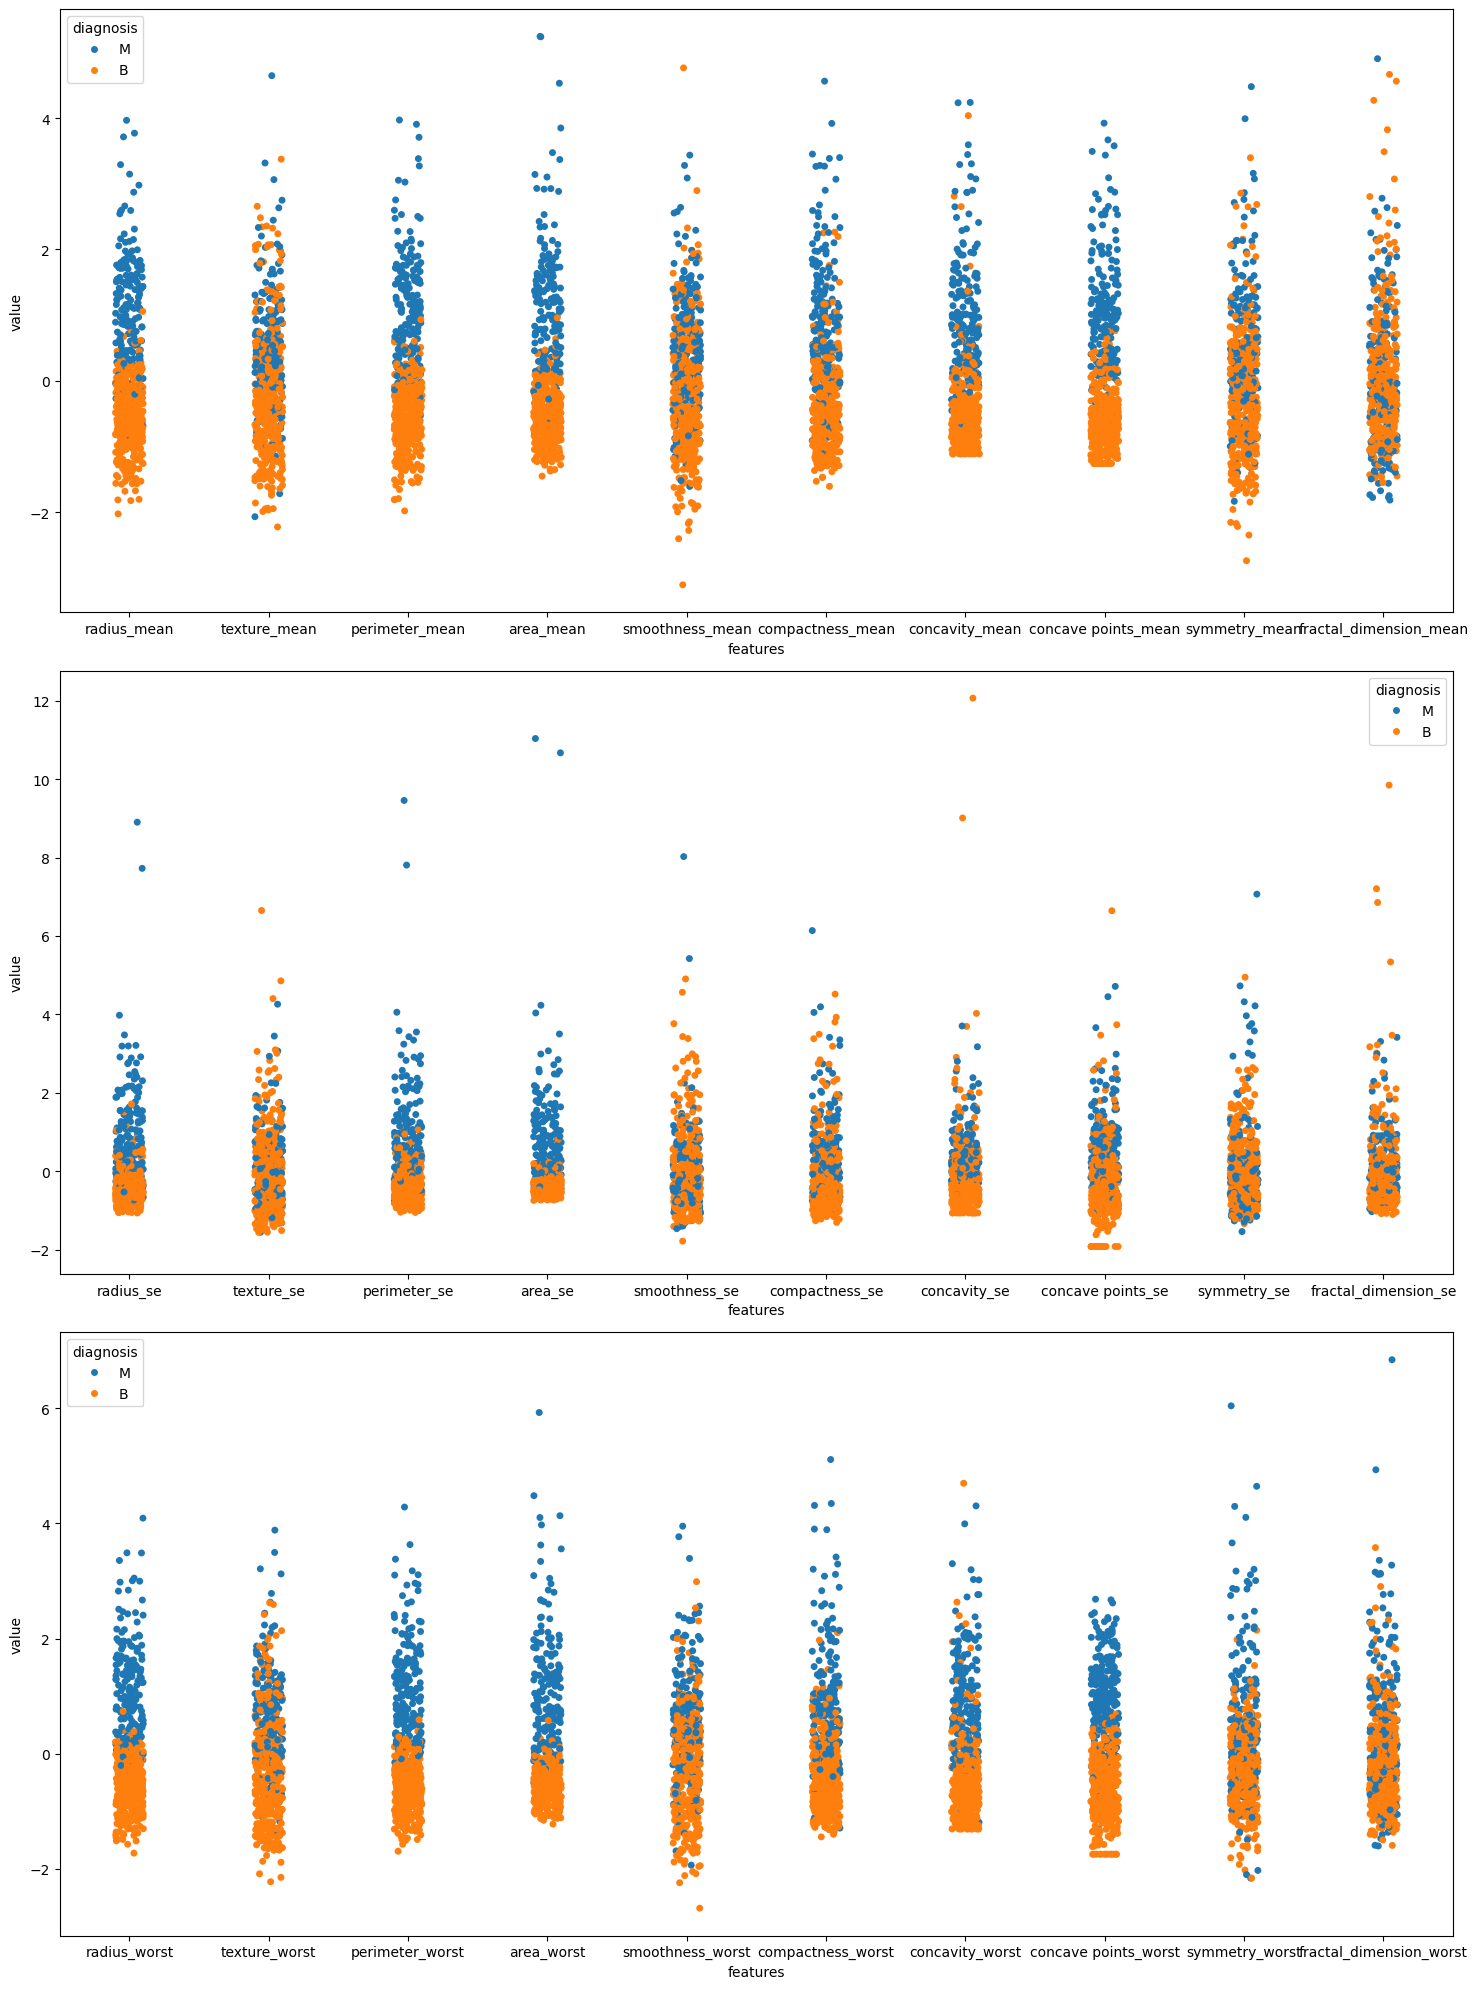

In [10]:
# Creating 3 subplots for 3 sets of 10 features each for the swarm plot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))

# Plotting each set of 10 features using swarm plot
for i in range(3):
    subset_features = features[i*10:(i+1)*10]
    data_melted = pd.melt(data_violin, id_vars="diagnosis", value_vars=subset_features, var_name="features", value_name="value")
    sns.stripplot(x="features", y="value", hue="diagnosis", data=data_melted, ax=axes[i])

plt.tight_layout()
plt.show()

Add more description to this.

## Heatmap

<Axes: >

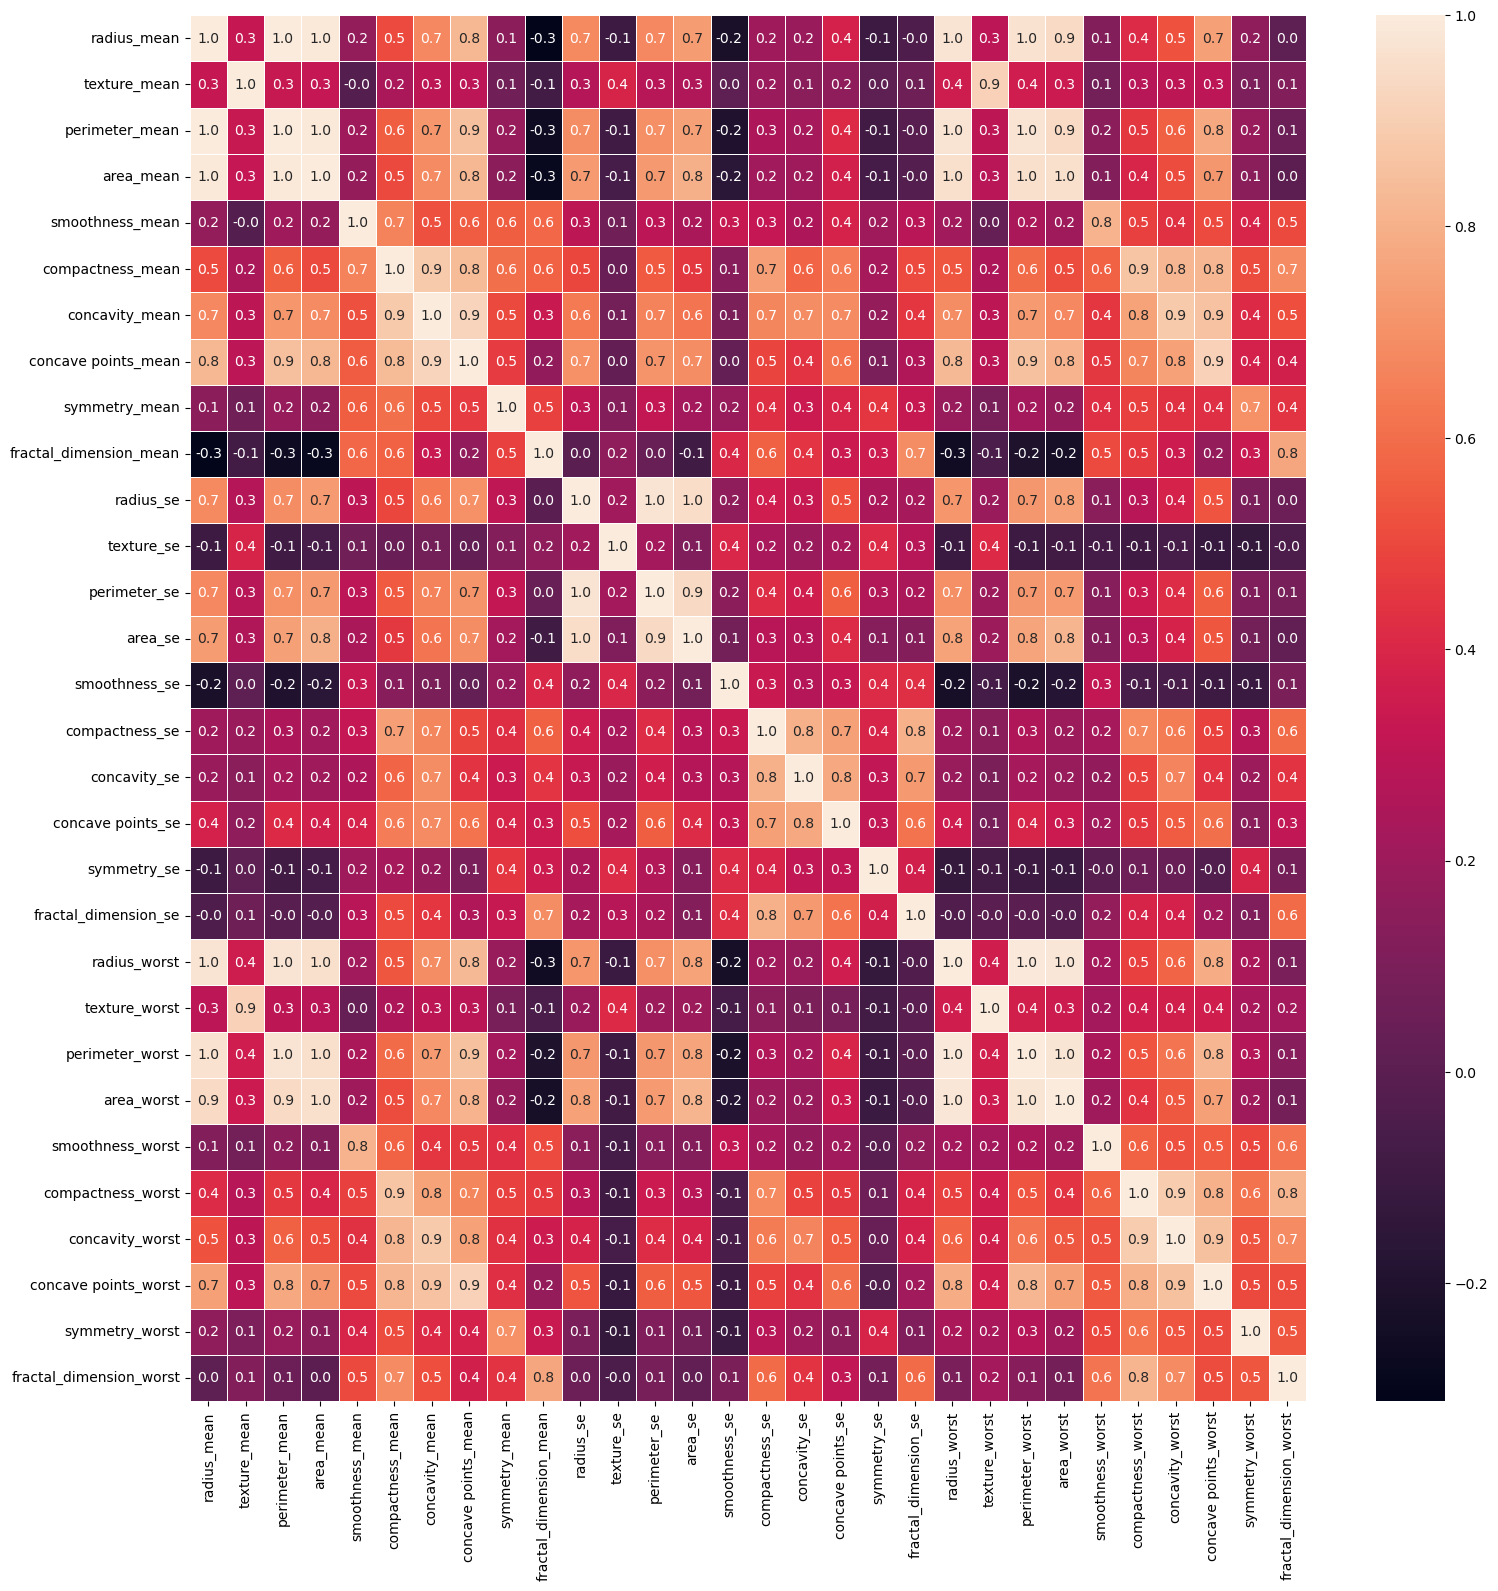

In [11]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Baseline for Classification

Accuracy:  0.9649122807017544


<Axes: >

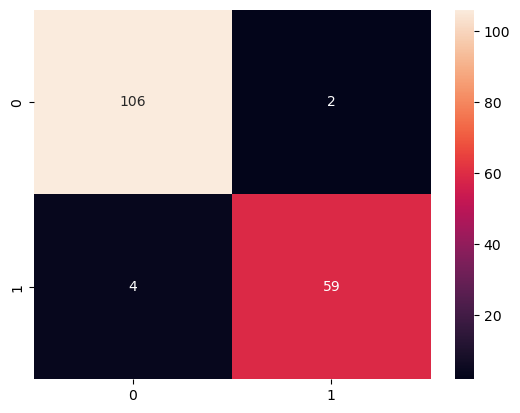

In [19]:
# split data train 70 % and test 30 %
x_train_base, x_test_base, y_train_base, y_test_base = train_test_split(x, y, test_size=0.3, random_state=42)

clf_rf_base = RandomForestClassifier(random_state=43)      
clf_rf_base = clf_rf_base.fit(x_train_base,y_train_base)

ac = accuracy_score(y_test_base,clf_rf_base.predict(x_test_base))
print('Accuracy: ', ac)
cm = confusion_matrix(y_test_base,clf_rf_base.predict(x_test_base))
sns.heatmap(cm,annot=True,fmt="d")

The score for baseline is around 96%.

# Feature Selection

## Using Correlation

Based on the heatmap, there is some things that we get. Take a look at the matrix with high correlation, we will only take one when there is a high correlation.
1. `radius_mean`, `perimeter_mean`, and `area_mean`
2. `texture_mean` and `texture_worst`
3. `compactness_mean`, `concavity_mean`, and `concave_points_mean`
4. `radius_se`, `perimeter_se`, and `area_se`
5. `compactness_se`, `concavity_se`, and `concave_points_se`
6. `radius_worst`, `perimeter_worst`, and `area_worst`
7. `compactness_worst`, `concavity_worst`, and `concave_points_worst`
8. `symmetry_mean` and `symmetry_worst`
9. `smoothness_mean` and `compactness_mean`
10. `fractal_dimension_mean` and `fractal_dimension_worst`
11. `fractal_dimension_se` and `compactness_se`

From that we will drop this columns:
1. `perimeter_mean`
2. `area_mean`
3. `texture_worst`
4. `concavity_mean`
5. `concave_points_mean`
6. `smoothness_mean`
7. `perimeter_se`
8. `area_se`
9. `concavity_se`
10. `concave_points_se`
11. `perimeter_worst`
12. `area_worst`
13. `concavity_worst`
14. `concave_points_worst`
15. `symmetry_worst`
16. `fractal_dimension_worst`
17. `fractal_dimension_se`
18. `compactness_worst`
19. `radius_worst`

In [13]:
drop_list1 = [
    'perimeter_mean', 
    'area_mean',
    'texture_worst',
    'concavity_mean',
    'concave points_mean',
    'smoothness_mean',
    'perimeter_se',
    'area_se',
    'concavity_se',
    'concave points_se',
    'perimeter_worst',
    'area_worst',
    'concavity_worst',
    'concave points_worst',
    'symmetry_worst',
    'fractal_dimension_worst',
    'fractal_dimension_se',
    'compactness_worst',
    'radius_worst'
]
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,radius_mean,texture_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,smoothness_worst
0,17.99,10.38,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.1622
1,20.57,17.77,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.1238
2,19.69,21.25,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.1444
3,11.42,20.38,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.2098
4,20.29,14.34,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.1374


<Axes: >

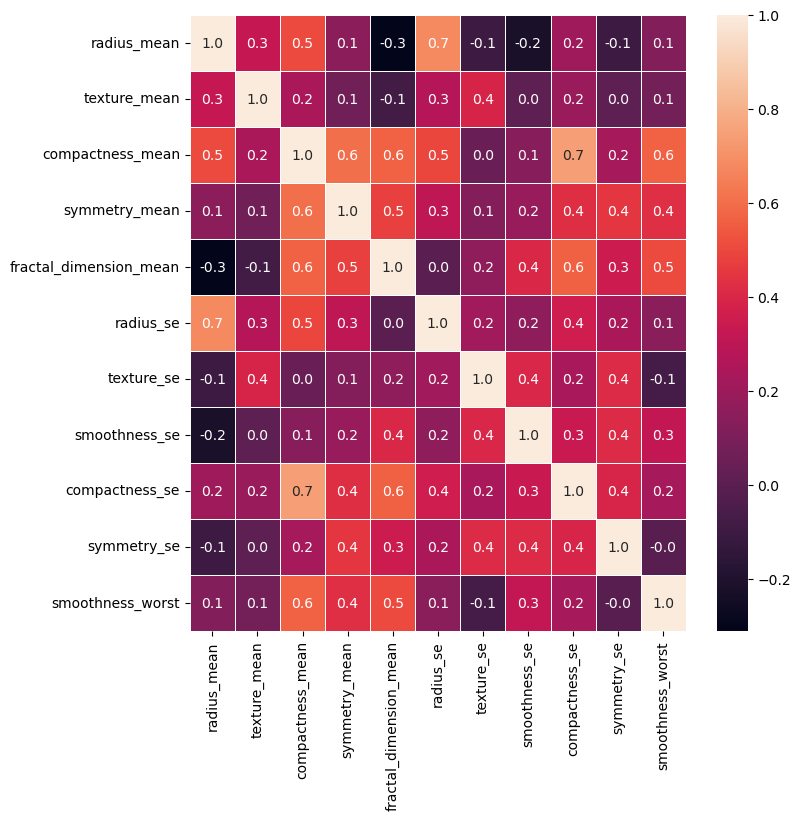

In [14]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

As we can see in the new data, the heatmap is quite different as we dropped a lot of column. There are no more high correlation.

Accuracy:  0.9824561403508771


<Axes: >

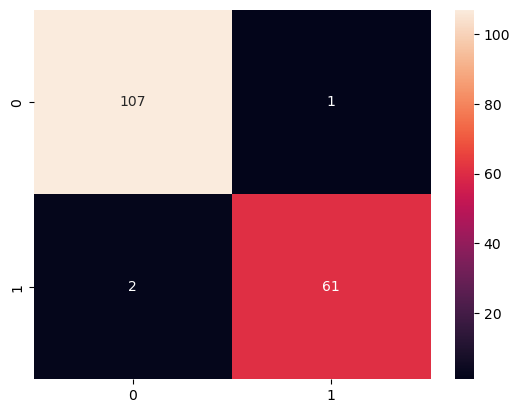

In [20]:
# split data train 70 % and test 30 %
x_train_corr, x_test_corr, y_train_corr, y_test_corr = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf_corr = RandomForestClassifier(random_state=43)      
clf_rf_corr = clf_rf_corr.fit(x_train_corr,y_train_corr)

ac = accuracy_score(y_test_corr,clf_rf_corr.predict(x_test_corr))
print('Accuracy: ', ac)
cm = confusion_matrix(y_test_corr,clf_rf_corr.predict(x_test_corr))
sns.heatmap(cm,annot=True,fmt="d")

This is a pretty good result with 98% in accuracy score, as we drop quite a lot of features.

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_rfecv = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_rfecv, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 14
Best features : Index(['radius_mean', 'texture_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')


## Recursive Feature Elimination

## LDA

Accuracy:  0.9532163742690059


<Axes: >

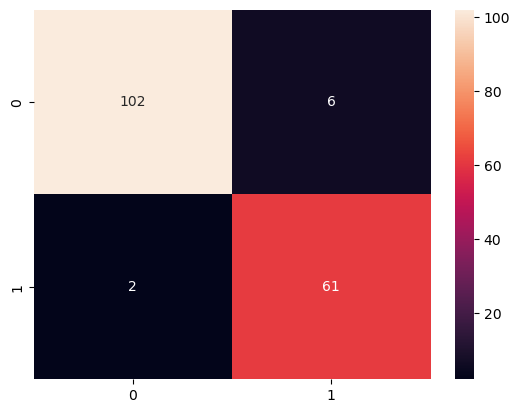

In [21]:
# Split the data into training and testing sets
x_train_lda, x_test_lda, y_train_lda, y_test_lda = train_test_split(x, y, test_size=0.3, random_state=42)

# Apply Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
x_train_lda = lda.fit_transform(x_train_lda, y_train_lda)
x_test_lda = lda.transform(x_test_lda)

# Use Random Forest for prediction
clf_rf_lda = RandomForestClassifier(random_state=42)
clf_rf_lda.fit(x_train_lda, y_train_lda)

# Make predictions on the test set
y_pred = clf_rf_lda.predict(x_test_lda)

# Print the results
ac = accuracy_score(y_test_lda,clf_rf_lda.predict(x_test_lda))
print('Accuracy: ', ac)
cm = confusion_matrix(y_test_lda,clf_rf_lda.predict(x_test_lda))
sns.heatmap(cm,annot=True,fmt="d")

The accuracy decreased from the baseline as we use LDA.

## PCA

Accuracy:  0.9473684210526315


<Axes: >

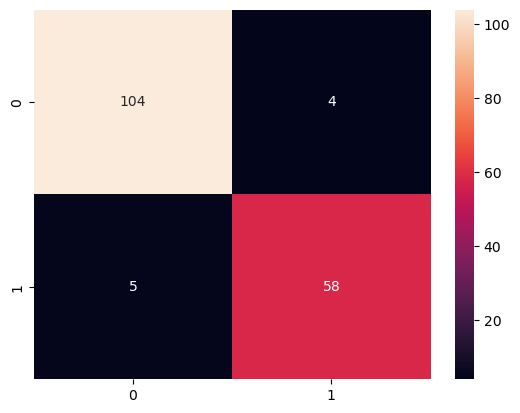

In [22]:
# Split the data into training and testing sets
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x, y, test_size=0.3, random_state=42)

# Apply Principal Component Analysis (PCA)
pca = PCA(n_components=3)  # Set the number of components as needed
x_train_pca = pca.fit_transform(x_train_pca)
x_test_pca = pca.transform(x_test_pca)

# Use Random Forest for prediction
clf_rf_pca = RandomForestClassifier(random_state=42)
clf_rf_pca.fit(x_train_pca, y_train_pca)

# Make predictions on the test set
y_pred = clf_rf_pca.predict(x_test_pca)

# Evaluate the model
ac = accuracy_score(y_test_pca,clf_rf_pca.predict(x_test_pca))
print('Accuracy: ', ac)
cm = confusion_matrix(y_test_pca,clf_rf_pca.predict(x_test_pca))
sns.heatmap(cm,annot=True,fmt="d")

It decreased even more in PDA.

# Feature Selection + Feature Extraction

## Feature Selection with Correlation + LDA

Accuracy:  0.9532163742690059


<Axes: >

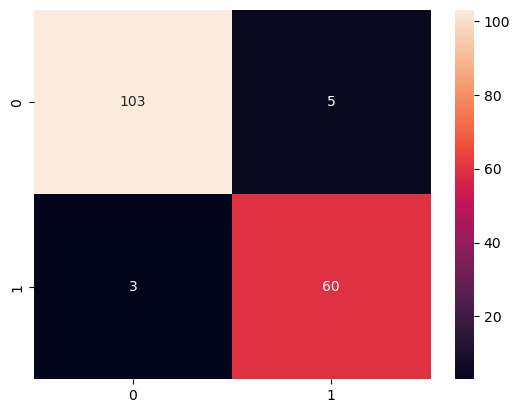

In [23]:
# Split the data into training and testing sets
x_train_lda_corr, x_test_lda_corr, y_train_lda_corr, y_test_lda_corr = train_test_split(x_1, y, test_size=0.3, random_state=42)

# Apply Linear Discriminant Analysis (LDA)
lda_corr = LinearDiscriminantAnalysis()
x_train_lda_corr = lda_corr.fit_transform(x_train_lda_corr, y_train_lda_corr)
x_test_lda_corr = lda_corr.transform(x_test_lda_corr)

# Use Random Forest for prediction
clf_rf_lda_corr = RandomForestClassifier(random_state=42)
clf_rf_lda_corr.fit(x_train_lda_corr, y_train_lda_corr)

# Make predictions on the test set
y_pred = clf_rf_lda_corr.predict(x_test_lda_corr)

# Print the results
ac_3 = accuracy_score(y_test_lda_corr,clf_rf_lda_corr.predict(x_test_lda_corr))
print('Accuracy: ', ac_3)
cm_3 = confusion_matrix(y_test_lda_corr,clf_rf_lda_corr.predict(x_test_lda_corr))
sns.heatmap(cm_3,annot=True,fmt="d")

With combining the feature selection and extraction, it doesn't yield better result than just feature selection nor feature extraction.